In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [2]:
df = pd.read_csv("Sale_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


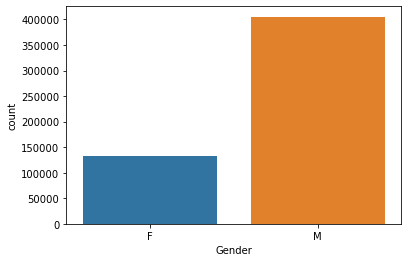

M    405380
F    132197
Name: Gender, dtype: int64

In [3]:
sns.countplot(data = df, x = "Gender")
plt.show()
df["Gender"].value_counts()

In [4]:
data_knn = df[["Occupation", "Purchase", "Gender"]]


In [5]:
x = data_knn[["Occupation", "Purchase"]]
y = data_knn.Gender

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 42)

In [8]:
knn_clf = KNeighborsClassifier(n_neighbors=1)

In [9]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
knn_clf.predict([[4,8130]])

array(['M'], dtype=object)

In [11]:
knn_clf.score(x_train, y_train)

0.7977342766613135

In [12]:
pred = knn_clf.predict(x_train)

In [14]:
cm = confusion_matrix(y_train, pred)

In [15]:
cm

array([[ 46990,  32038],
       [ 33202, 210316]], dtype=int64)

In [16]:
ya = (y_train.values == 'M')
yp = (pred == "M")

In [17]:
recall_score(ya, yp)

0.8636568959994744

Step: 1
Step: 2
Step: 3
Step: 4
Step: 5
Step: 6
Step: 7
Step: 8
Step: 9
Step: 10
Step: 11
Step: 12
Step: 13
Step: 14
Step: 15
Step: 16
Step: 17
Step: 18
Step: 19
Step: 20
Step: 21
Step: 22
Step: 23
Step: 24
Step: 25
Step: 26
Step: 27
Step: 28
Step: 29


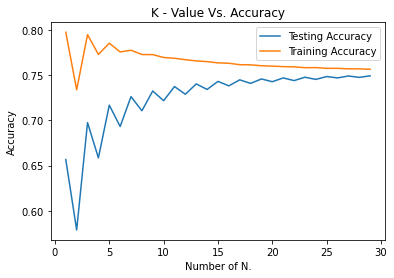

Best Accuracy is 0.7494500792908929 with k = 29


In [18]:
n = np.arange(1,30)
train_accuracy = []
test_accuracy = []
for i,k in enumerate(n):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(x_train, y_train)
    train_accuracy.append(knn_clf.score(x_train, y_train))
    test_accuracy.append(knn_clf.score(x_test, y_test))
    print("Step:", k)
plt.plot(n, test_accuracy, label = "Testing Accuracy")
plt.plot(n, train_accuracy, label = "Training Accuracy")
plt.legend()
plt.title("K - Value Vs. Accuracy")
plt.xlabel("Number of N.")
plt.ylabel("Accuracy")
plt.show()

print("Best Accuracy is {} with k = {}".format(np.max(test_accuracy), 
                                        1 + test_accuracy.index(np.max(test_accuracy))))